In [1]:
import pandas as pd

In [63]:
from geopy.geocoders import ArcGIS
from geopy.extra.rate_limiter import RateLimiter

In [254]:
import json

In [33]:
firms = pd.read_excel('Реестр ЕГРЮЛ г.Челябинск.xlsx')

In [34]:
firms.fillna('', inplace=True)

In [35]:
firms

,Название,ИНН,КПП,Адрес,Фамилия руководителя,Имя руководителя,Отчество руководителя,Вид деятельности,Телефоны,email,Выручка,Стоимость,Идентификатор ЭДО,ОКПО,Рег. номер ПФ,Код филиала,Сайт,ЕГАИС,GLN
0,"ПАО ""ЧТПЗ""",7449006730,744901001,"454129, г. Челябинск, ул. Машиностроителей, д....",,,,Металлопрокат,"8 (800) 234-50-05, 8 (351) 255-73-33, 8 (351) ...","info@chelpipe.ru, konstantin.panchenko@chelpip...",91827610000,148782400000,2BM-7449006730-2012100411135375991900000000000,00186654,084003000004,,"chelpipe.ru, market.chelpipe.ru",,
1,"ООО ""НОВАТЭК- ЧЕЛЯБИНСК""",7404056114,745301001,"454091, г. Челябинск, пр-кт Ленина, 42, А",Ромасенко,Вадим,Владимирович,Топливо и Энергетика,"8 (800) 700-80-74, 8 (351) 247-48-48, 8 (351) ...","dispetcher@novatek74.ru, gaz@rg74.novatek.ru, ...",58298220000,8303329000,2BM-7404056114-2012101009483684385930000000000,68628371,084001068391,,novatek74.ru,,
2,"АО ""ЧЭМК""",7447010227,744701001,"454081, г. Челябинск, ул. Героев Танкограда, д...",Ходоровский,Павел,Яковлевич,"Металлы, сплавы","8 (351) 772-63-10, 8 (351) 772-92-75","info@chemk.ru, romodin@chemk.ru, hodorovskij@c...",48985630000,27405640000,2BEffd3247cd22a4c14bfdf84e401ca79bd,00186507,084005000002,,chemk.ru,,
3,"ООО ""УРАЛЭНЕРГОСБЫТ""",7453313477,745301001,"454090, г. Челябинск, пр-кт Ленина, д. 28Д, ЭТ...",Батраков,Александр,Владимирович,Электроэнергия,"8 (351) 259-64-59, 8 (351) 214-87-65, 8 (351) ...","alena.kondratyeva@uralsbyt.ru, uralsbyt@esk-ur...",48864110000,1834573000,2BE72fdef7b2bd741929636c5b94ddfe68b,19151032,084001085459,,,,
4,"АО ""ЧЦЗ""",7448000013,744801001,"454008, г. Челябинск, Свердловский тракт, д. 24",,,,"Металлы, сплавы","8 (351) 799-00-09, 8 (351) 799-00-00, 8 (351) ...","io@zinc.ru, vab@zinc.ru, eib@zinc.ru, v.korotk...",26649230000,35213190000,2BM-7448000013-2013022202504047094690000000000,00194228,084006001095,,zinc.ru,030000095411,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,"ООО ""КВАДРАТ""",7447278619,744701001,"454084, г. Челябинск, ул. Каслинская, д. 77, п...",Комаров,Александр,Александрович,"Бытовая химия, косметика и парфюмерия",,,,,2BEdf505a0817464ba39169be1649ca38e5,,084005097702,,,,
99996,"ООО ""ГЕРМЕС 74 ТРЕЙД""",7447278658,744701001,"454021, г.Челябинск, ул.Молодогвардейцев, д.62...",Шахматов,Денис,Олегович,"Продукция мукомольной промышленности, крупы",,,,,,,084005097706,,,,
99997,"ООО ""УРАЛЬСКАЯ ДЕЛОВАЯ ЛИГА""",7447278577,744701001,"454081, г. Челябинск, пр-кт Победы, д. 127, КВ...",Пчелинцева,Лариса,Вячеславовна,Услуги в области права,,,,,,20120798,084005097707,,,,
99998,"ООО ""КЛЕВЕР""",7447278601,744701001,"454084, г. Челябинск, ул. Каслинская, д. 77, п...",Комаров,Александр,Александрович,Клининговые услуги,,,,,2BE4754df052057405480ba01585e6923fe,,084005097703,,,,


In [36]:
# В задании было предложен сузить район поиска организаций

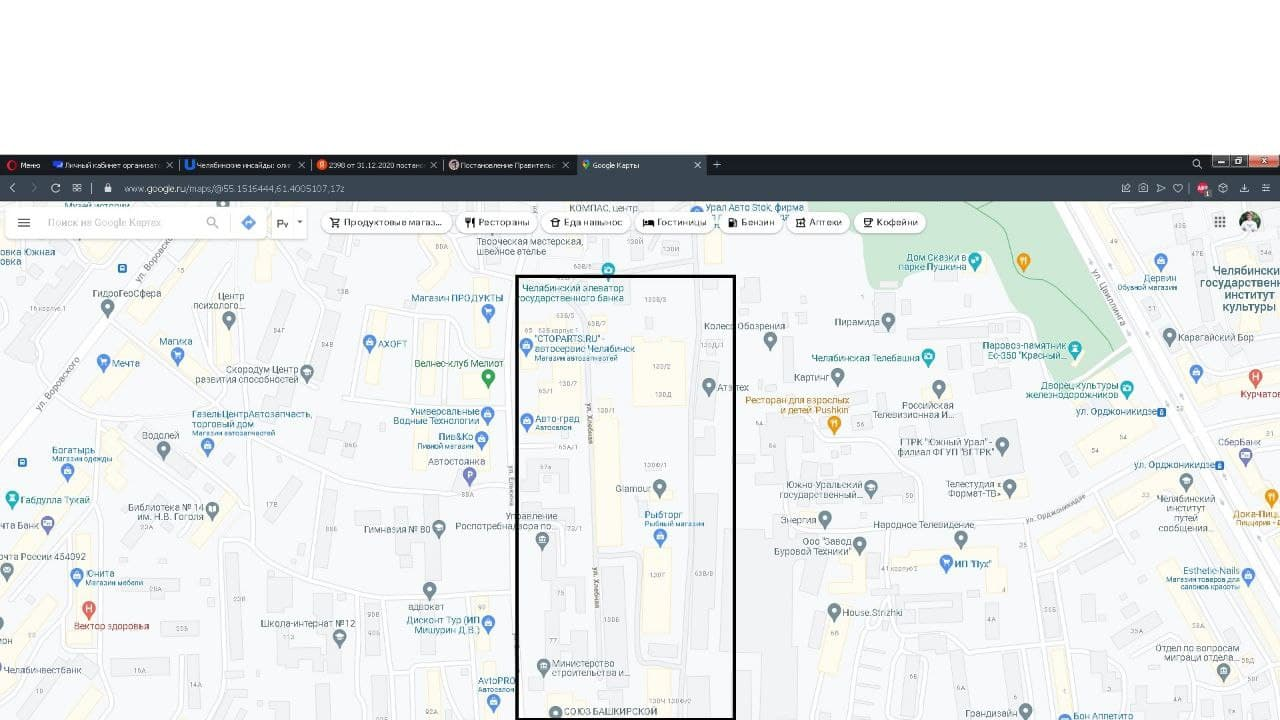

In [37]:
# геокоординаты этого района

In [ ]:
point_1 = (55.154321, 61.398143)
point_2 = (55.149933, 61.401521)

In [ ]:
# подкорректируем точки для последующего поиска

In [92]:
x_1 = point_1[0]
y_1 = point_1[1]
x_2 = point_2[0]
y_2 = point_2[1]
point_min = (min(x_1, x_2), min(y_1, y_2))
point_max = (max(x_1, x_2), max(y_1, y_2))
print(point_min, ':', point_max)

(55.149933, 61.398143) : (55.154321, 61.401521)


In [40]:
# в этот район попадают улицы: Елькина, Хлебная, Кирова

In [41]:
# ограничим базу организаций до указанного района

In [ ]:
# ВАЖНО !!!
# здесь следует отметить, что в данной задаче анализ предприятий будет производится только по юридическому адресу,
# но в реально работающей системе необходимо искать нарушителей по их фактическому местоположению объектов,
# при этом у одного предприятия может быть несколько объектов, находящихся по разным фактическим адресам

# фактический адрес можно определить в первую очередь с помощью геоинформационных систем,
# таких как Яндекс, 2Gis, Google и пр., также можно провести анализ сайтов предприятий, 
# где они скорее всего будут указывать свой фактический адрес, а также различных рекламных площадок

In [42]:
firms['look'] = (firms['Адрес'].str.lower().str.find('елькина') != -1) | \
                (firms['Адрес'].str.lower().str.find('хлебная') != -1) | \
                (firms['Адрес'].str.lower().str.find('кирова') != -1)

In [43]:
firms_small = firms[firms['look']].drop('look', axis=1)

In [44]:
firms_small

,Название,ИНН,КПП,Адрес,Фамилия руководителя,Имя руководителя,Отчество руководителя,Вид деятельности,Телефоны,email,Выручка,Стоимость,Идентификатор ЭДО,ОКПО,Рег. номер ПФ,Код филиала,Сайт,ЕГАИС,GLN
58,"ООО ""СМС ГРУП""",7702721013,745301001,"454091, г. Челябинск, ул. Кирова, д. 159, ОФИС...",Шнайдер,Андре,,"Ремонт, монтаж и обслуживание машин и технолог...",8 (351) 779-30-15,"nv@sms-siemag.ru, vasinanad1@rambler.ru",3304634000,965964000,2BM-7702721013-2012052807494994274880000000000,64433096,084001081748,,,,
69,"МУП ""ЧКТС""",7448005075,745101001,"454048, г. Челябинск, ул. Елькина, д. 112, ЭТА...",Шершнев,Роман,Сергеевич,Теплоэнергия,"8 (351) 723-01-91, 8 (351) 723-01-81, 8 (351) ...","info@chkts.ru, ods@chkts.ru, chkts@chkts.ru, c...",2701967000,41596000,2BE49ab8a04ab5249e88f7ba1a8904bbe3f,04042828,084002203830,,chkts.ru,,
238,"ООО ""СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ""ФЛАЙ ПЛЭНИ...",7453323796,745301001,"454091, г. Челябинск, ул. Кирова, д. 159, ОФИС...",Черепанов,Даниил,Юрьевич,"Управление проектами строительства, строительн...",,,965274000,19239000,2BEab86e51564564de4bec7dacdd4390d78,32967726,084001088521,,,,
253,"ООО ""СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ""ФЛАЙ ПЛЭНИ...",7453326726,745301001,"454091, г. Челябинск, ул. Кирова, д. 159, ОФИС...",Фахриева,Динара,Рафкатовна,"Управление проектами строительства, строительн...",8 (351) 246-90-04,,889410000,21452000,2BE8eda91a9711e49cc8dbda29c61d77abd,36358912,084001089538,,flyplaning.ru,,
282,"ООО ""ОРАНЖ АППС""",7452115144,745301001,"454091, г. Челябинск, ул. Кирова, д. 159, ОФИС...",Староверов,Антон,Сергеевич,"Компьютеры и комплектующие, вычислительная тех...",,,815217000,1402754000,2BE4333c74d55634bc499367ab59790e567,51489681,084001093158,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99657,"ООО ""МИРАНДА""",7447279059,744701001,"454084, г. Челябинск, ул. Кирова, д. 2, НЕЖ.ПО...",Симоненков,Сергей,Александрович,Отделочные работы,,,,,,,084005097845,,,,
99779,"ООО ""РЕСУРС""",7447278880,744701001,"454084, г. Челябинск, ул. Кирова, д. 1, ОФИС 1",Малкова,Виктория,Валинуровна,Готовые металлоизделия и металлоконструкции,,,,,2BE77f53e63d48048dd84124583538c49ae,,084005097801,,,,
99911,"ООО ""ПРОГРЕСС АВТО""",7451429740,744701001,"454084, г. Челябинск, ул. Кирова, д. 7А, ПОМ 1...",Халилов,Ринат,Сайдуллович,"Автосервисы, шиномонтаж",,,,,2BE35d6534d5ed84faeb60cf85740731100,20150983,084005102742,,,,
99963,"ООО ""МЕТРОПОЛЬ""",7451429638,745101001,"454092, г. Челябинск, ул. Кирова, д. 130, НЕЖ....",Подгорный,Владислав,Викторович,Строительно-монтажные работы,,,,,,,084002096691,,,,


In [ ]:
# получим геокоординаты предприятий с помощью системы ArcGIS (можно также использовать API Геосервис Яндекса)

In [ ]:
geolocator = ArcGIS()
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [104]:
firms_small['location'] = firms_small['Адрес'].apply(geocode)

In [105]:
firms_small['point'] = firms_small['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [106]:
# операцию геокодирования НЕ НУЖНО производить каждый раз заново - это очень длительная операция!
# полученные координаты можно хранить в базе, а определение геокоординат производить только для новых предприятий

In [108]:
# сохранять можно, например, в csv-файл
firms_small.to_csv('список предприятий.csv', index=False)

In [109]:
# ограничим список предприятий заданной областью
firms_small['look'] = firms_small['point'].\
    apply(lambda loc: True if (point_min[0] <= loc[0] <= point_max[0]) and 
                              (point_min[1] <= loc[1] <= point_max[1]) else False)

In [111]:
firms_small = firms_small[firms_small['look']].drop('look', axis=1)

In [112]:
firms_small

,Название,ИНН,КПП,Адрес,Фамилия руководителя,Имя руководителя,Отчество руководителя,Вид деятельности,Телефоны,email,...,Стоимость,Идентификатор ЭДО,ОКПО,Рег. номер ПФ,Код филиала,Сайт,ЕГАИС,GLN,location,point
1318,"ООО ""АСТ-ЮГ""",7451442188,745101001,"454092, г. Челябинск, ул. Кирова, д. 130Д, ПОМ...",Бургарт,Евгений,Владимирович,Готовые металлоизделия и металлоконструкции,,,...,1191000,2BEa839b52e00d147cea317191cac2b9877,67253130,084002100912,,,,,"(улица Кирова, 130Д, Челябинск, Челябинская об...","(55.152069993853615, 61.400009981077176, 0.0)"
1588,"ООО ""ЮЖУРАЛТОРГ""",7438030410,745101001,"454091, г. Челябинск, ул. Кирова, д. 130, Ш",Старикова,Евгения,Валерьевна,Продукты питания и напитки прочие,8 (351) 211-31-32,rgt74.10@yandex.ru,...,8609000,2BE8ccbca4a30cd11e3bfda005056917125,37878878,084002079575,,,,,"(улица Кирова, 130Ш, Челябинск, Челябинская об...","(55.14998998267109, 61.40142995929412, 0.0)"
1961,"ООО ""СВАРОЖИЧ""",7451409180,745101001,"454092, г. Челябинск, ул. Кирова, д. 130Д, стр...",Южаков,Николай,Владимирович,Металлопрокат,"8 (351) 225-12-64, 8 (351) 700-07-49",,...,-29430000,2BEb26ee9ae40d34600b341b4e936eed043,03117278,084002092333,,сварожич74.рф,,,"(улица Кирова, 130Д, Челябинск, Челябинская об...","(55.152069993853615, 61.400009981077176, 0.0)"
4731,"ООО ""КАНТ""",7451411687,745101001,"454091, г. Челябинск, ул. Кирова, д. 130Ш, ПОМ...",Потапов,Александр,Николаевич,Продукты питания и напитки прочие,8 (351) 211-31-32,,...,1015048,2BEca0efb656d4e497c938c5353da272650,04156271,084002092845,,,,,"(улица Кирова, 130Ш, Челябинск, Челябинская об...","(55.14998998267109, 61.40142995929412, 0.0)"
8170,"ООО ""СТРОЙСИТИ""",7451447757,745101001,"454092, г. Челябинск, ул. Елькина, д. 84, КВ. 68",Микаелян,Гурген,Ашотович,Строительно-монтажные работы,,,...,105000,,42548806,084002102271,,,,,"(улица Елькина, 84, Челябинск, Челябинская обл...","(55.15315809595256, 61.398261150003144, 0.0)"
8442,"ООО ""СТАРТ""",7451402756,745101001,"454092, г. Челябинск, ул. Елькина, д. 84, КВАР...",Нуриев,Захид,Вагиф оглы,"Рестораны, кафе, столовые",,,...,4273027,2BEed4c7f49a4ac4faf9a11e37b89ad9539,74225861,084002090961,,,,,"(улица Елькина, 84, Челябинск, Челябинская обл...","(55.15315809595256, 61.398261150003144, 0.0)"
9505,МЕЛИОТ-ИНВЕСТ ООО,7447257513,745101001,"454092, г. Челябинск, ул. Елькина, д. 84, оф. 203",Фрейман,Аркадий,Лазаревич,"Купля-продажа жилых и нежилых зданий, сооружен...",8 (351) 281-42-04,,...,4497582,2BEa324542c96ac4d58b239936e1eae1794,74201903,084002094446,,,,,"(улица Елькина, 84, Челябинск, Челябинская обл...","(55.15315809595256, 61.398261150003144, 0.0)"
9684,"ООО ИМП ""АКВЕС",7447047837,745101001,"454092, г. Челябинск, ул. Кирова, д. 130/7, ОФ...",Гончаров,Дмитрий,Николаевич,"Строительство, ремонт и обслуживание трубопров...","8 (351) 791-05-76, 8 (351) 235-05-72, 8 (351) ...",nicas-st@chel.surnet.ru,...,8248475,2BE73f96efec4dc11e19c745cf3fc3369f0,53856327,084002101322,,,,,"(улица Кирова, 130 корп 7, Челябинск, Челябинс...","(55.15292000265461, 61.39935996448591, 0.0)"
10042,"ООО ""МОРОЗ И К""",7451105697,745101001,"454092, г. Челябинск, ул. Елькина, д. 67А, НЕЖ...",Баймаков,Игорь,Юрьевич,"Аренда и лизинг недвижимости, обмен, приватизация","8 (351) 263-11-22, 8 (351) 265-74-06",,...,12891010,2BM-7451105697-745101001-201401091218221406881,21591732,084002020461,,,,,"(улица Елькина, 67А, Челябинск, Челябинская об...","(55.152166170406545, 61.398525341867725, 0.0)"
11665,"ООО ""ТРЕОЛ""",7453091721,745101001,"454092, г. Челябинск, ул. Елькина, д. 67А, НЕЖ...",Баймаков,Игорь,Юрьевич,Электроэнергия,8 (351) 263-11-22,,...,8774410,2BE7adfc5deb3c64abeb5f7cd2b715155aa,34521466,084002058160,,,,,"(улица Елькина, 67А, Челябинск, Челябинская об...","(55.152166170406545, 61.398525341867725, 0.0)"


In [ ]:
# в заданную облать попали 51 предприятие (напомню, по юридическому адресу)

In [ ]:
# организаторы предоставили не полные данные о предприятиях:
# у предприятий отсутсвует список зарегистрированных кодов ОКВЭД

In [45]:
firms_small.columns

Index(['Название', 'ИНН', 'КПП', 'Адрес', 'Фамилия руководителя',
       'Имя руководителя', 'Отчество руководителя', 'Вид деятельности',
       'Телефоны', 'email', 'Выручка', 'Стоимость', 'Идентификатор ЭДО',
       'ОКПО', 'Рег. номер ПФ', 'Код филиала', 'Сайт', 'ЕГАИС', 'GLN'],
      dtype='object')

In [114]:
firms_small[['Название', 'ИНН', 'Вид деятельности']]

,Название,ИНН,Вид деятельности
1318,"ООО ""АСТ-ЮГ""",7451442188,Готовые металлоизделия и металлоконструкции
1588,"ООО ""ЮЖУРАЛТОРГ""",7438030410,Продукты питания и напитки прочие
1961,"ООО ""СВАРОЖИЧ""",7451409180,Металлопрокат
4731,"ООО ""КАНТ""",7451411687,Продукты питания и напитки прочие
8170,"ООО ""СТРОЙСИТИ""",7451447757,Строительно-монтажные работы
8442,"ООО ""СТАРТ""",7451402756,"Рестораны, кафе, столовые"
9505,МЕЛИОТ-ИНВЕСТ ООО,7447257513,"Купля-продажа жилых и нежилых зданий, сооружен..."
9684,"ООО ИМП ""АКВЕС",7447047837,"Строительство, ремонт и обслуживание трубопров..."
10042,"ООО ""МОРОЗ И К""",7451105697,"Аренда и лизинг недвижимости, обмен, приватизация"
11665,"ООО ""ТРЕОЛ""",7453091721,Электроэнергия


In [ ]:
# поэтому определим коды ОКВЭД вручную через поиск в Яндексе

In [115]:
# выгрузим данные в xlsx-файл
firms_small.to_excel('firms.xlsx', index=False)

In [238]:
# после поиска и занесения в таблицу кодов ОКВЭД, загрузим данные
firms_small = pd.read_excel('firms.xlsx')

In [239]:
firms_small.fillna('', inplace=True)

In [240]:
# для каждого предприятия преобразуем список его кодов ОКВЭД в множество
firms_small['list_OKVED'] = firms_small['OKVED_list'].str.replace(" ", "").str.split(',').apply(set)

In [241]:
firms_small

,Название,ИНН,КПП,Адрес,Фамилия руководителя,Имя руководителя,Отчество руководителя,Вид деятельности,Телефоны,email,...,Рег. номер ПФ,Код филиала,Сайт,ЕГАИС,GLN,location,point,OKVED_1,OKVED_list,list_OKVED
0,"ООО ""АСТ-ЮГ""",7451442188,745101001,"454092, г. Челябинск, ул. Кирова, д. 130Д, ПОМ...",Бургарт,Евгений,Владимирович,Готовые металлоизделия и металлоконструкции,,,...,84002100912,,,,,"улица Кирова, 130Д, Челябинск, Челябинская обл...","(55.152069993853615, 61.400009981077176, 0.0)",25.11,"25.99, 41.20, 46.62, 46.63, 46.69, 46.71, 46.7...","{49.41, 46.62, 52.29, 25.99, 46.72, 71.12.6, 7..."
1,"ООО ""ЮЖУРАЛТОРГ""",7438030410,745101001,"454091, г. Челябинск, ул. Кирова, д. 130, Ш",Старикова,Евгения,Валерьевна,Продукты питания и напитки прочие,8 (351) 211-31-32,rgt74.10@yandex.ru,...,84002079575,,,,,"улица Кирова, 130Ш, Челябинск, Челябинская обл...","(55.14998998267109, 61.40142995929412, 0.0)",46.38,"10.11, 10.2, 10.39.1, 10.39.2, 10.51, 10.61.3,...","{10.61.3, 45.19.4, 10.81.2, 52.29, 45.19.2, 45..."
2,"ООО ""СВАРОЖИЧ""",7451409180,745101001,"454092, г. Челябинск, ул. Кирова, д. 130Д, стр...",Южаков,Николай,Владимирович,Металлопрокат,"8 (351) 225-12-64, 8 (351) 700-07-49",,...,84002092333,,сварожич74.рф,,,"улица Кирова, 130Д, Челябинск, Челябинская обл...","(55.152069993853615, 61.400009981077176, 0.0)",24.33,"16.10, 16.10.9, 16.21, 16.23, 16.29.1, 23.32, ...","{46.49.2, 52.29, 16.10, 16.21, 24.10.9, 46.73,..."
3,"ООО ""КАНТ""",7451411687,745101001,"454091, г. Челябинск, ул. Кирова, д. 130Ш, ПОМ...",Потапов,Александр,Николаевич,Продукты питания и напитки прочие,8 (351) 211-31-32,,...,84002092845,,,,,"улица Кирова, 130Ш, Челябинск, Челябинская обл...","(55.14998998267109, 61.40142995929412, 0.0)",46.38,"10.11, 10.12, 10.13, 10.31, 10.32, 10.39, 10.4...","{46.90, 47.22, 10.39, 47.26, 47.21, 45.31, 11...."
4,"ООО ""СТРОЙСИТИ""",7451447757,745101001,"454092, г. Челябинск, ул. Елькина, д. 84, КВ. 68",Микаелян,Гурген,Ашотович,Строительно-монтажные работы,,,...,84002102271,,,,,"улица Елькина, 84, Челябинск, Челябинская обла...","(55.15315809595256, 61.398261150003144, 0.0)",41.20,,{}
5,"ООО ""СТАРТ""",7451402756,745101001,"454092, г. Челябинск, ул. Елькина, д. 84, КВАР...",Нуриев,Захид,Вагиф оглы,"Рестораны, кафе, столовые",,,...,84002090961,,,,,"улица Елькина, 84, Челябинск, Челябинская обла...","(55.15315809595256, 61.398261150003144, 0.0)",56.10,"47.11, 47.21, 47.22, 47.23, 47.24, 47.25, 47.2...","{56.10.1, 47.24, 47.29, 56.30, 47.22, 56.10.3,..."
6,МЕЛИОТ-ИНВЕСТ ООО,7447257513,745101001,"454092, г. Челябинск, ул. Елькина, д. 84, оф. 203",Фрейман,Аркадий,Лазаревич,"Купля-продажа жилых и нежилых зданий, сооружен...",8 (351) 281-42-04,,...,84002094446,,,,,"улица Елькина, 84, Челябинск, Челябинская обла...","(55.15315809595256, 61.398261150003144, 0.0)",68.10,"47.75, 68.10.1, 68.20, 68.31, 68.31.1, 68.31.1...","{68.31.31, 68.31.1, 68.31, 68.31.4, 68.31.12, ..."
7,"ООО ИМП ""АКВЕС",7447047837,745101001,"454092, г. Челябинск, ул. Кирова, д. 130/7, ОФ...",Гончаров,Дмитрий,Николаевич,"Строительство, ремонт и обслуживание трубопров...","8 (351) 791-05-76, 8 (351) 235-05-72, 8 (351) ...",nicas-st@chel.surnet.ru,...,84002101322,,,,,"улица Кирова, 130 корп 7, Челябинск, Челябинск...","(55.15292000265461, 61.39935996448591, 0.0)",43.22,"25.11, 41.20, 42.21, 42.22.2, 42.99, 43.21, 43...","{43.91, 25.11, 46.90, 43.21, 43.99.1, 42.99, 4..."
8,"ООО ""МОРОЗ И К""",7451105697,745101001,"454092, г. Челябинск, ул. Елькина, д. 67А, НЕЖ...",Баймаков,Игорь,Юрьевич,"Аренда и лизинг недвижимости, обмен, приватизация","8 (351) 263-11-22, 8 (351) 265-74-06",,...,84002020461,,,,,"улица Елькина, 67А, Челябинск, Челябинская обл...","(55.152166170406545, 61.398525341867725, 0.0)",68.20.2,"41.20, 68.20.1, 68.31.12, 68.31.22, 68.31.32, ...","{70.22, 68.31.12, 68.31.42, 68.31.22, 68.20.1,..."
9,"ООО ""ТРЕОЛ""",7453091721,745101001,"454092, г. Челябинск, ул. Елькина, д. 67А, НЕЖ...",Баймаков,Игорь,Юрьевич,Электроэнергия,8 (351) 263-11-22,,...,84002058160,,,,,"

In [242]:
# загрузим список видов экономической дейтельности деятельности, наносящих вред окружающей среде
# согласно Постановления от 31.12.2020 №2398

#harm_okved = read_csv('harm_okved.csv')

# НУЖЕН ПОЛНЫЙ СПИСОК ОКВЭД  !!!!!

harm_okved = ['19.1', '19.10', '19.2', '19.20', '19.20.1', '19.20.2', '19.20.9', 
              '24.5', '25.61', '35.30', '10.41', '23.61']

In [243]:
# преобразуем список "вредных" ОКВЭД в множество
harm_okved = set(harm_okved)

In [244]:
firms_small['harm'] = firms_small['OKVED_1'].apply(lambda x: x in harm_okved)

In [272]:
# список предприятий, у которых основной вид деятельности находится в числе "вредных" ОКВЭД
# эти предприятия будут иметь статус нарушителей, если не встали на учет
harm_firms = firms_small[firms_small['harm']][['Название', 'ИНН', 'Адрес', 'Телефоны', 'OKVED_1', 'point']]

In [273]:
harm_firms

,Название,ИНН,Адрес,Телефоны,OKVED_1,point
10,"Живая Сталь, ООО",7447211300,"454092, г. Челябинск, ул. Кирова, д. 130Д, к. ...",8 (351) 225-43-64,25.61,"(55.152069993853615, 61.400009981077176, 0.0)"
30,"ООО ""УРАЛПРОДУКТ""",7451374322,"454092, г. Челябинск, ул. Елькина, д. 84, 14",,10.41,"(55.15315809595256, 61.398261150003144, 0.0)"


In [247]:
firms_small['harm_maybe'] = firms_small['list_OKVED'].apply(lambda x: not x.isdisjoint(harm_okved))

In [270]:
# список предприятий, у которых в списке дополнительных видов деятельности имеется код из числа "вредных" ОКВЭД
# эти предприятия будут иметь статус потенциальных нарушителей, если не встали на учет
# т.к. нужно сначала доказать, что предприятие работает не по основному коду ОКВЭД, а по дополнительному
harm_maybe_firms = firms_small[firms_small['harm_maybe']][['Название', 'ИНН', 'OKVED_1', 'OKVED_list', 'point']]

In [271]:
harm_maybe_firms

,Название,ИНН,OKVED_1,OKVED_list,point
3,"ООО ""КАНТ""",7451411687,46.38,"10.11, 10.12, 10.13, 10.31, 10.32, 10.39, 10.4...","(55.14998998267109, 61.40142995929412, 0.0)"
10,"Живая Сталь, ООО",7447211300,25.61,"24.5, 25.1, 25.62, 46.1, 46.4, 46.49, 46.6, 46...","(55.152069993853615, 61.400009981077176, 0.0)"
35,"ООО ""БЕТОКУБ""",7451391705,23.63,"23.61, 23.64, 46.13, 46.73, 68.31, 70.22","(55.15315809595256, 61.398261150003144, 0.0)"
37,"ООО ""ТРАКСЕРВИС""",7451357743,68.20,"25.61, 25.62, 28.30.8, 28.99, 45.1, 45.20, 45....","(55.15315809595256, 61.398261150003144, 0.0)"
44,"ООО ""ВЕСТЕРУС""",7451375277,77.32,"23.61, 23.63, 23.64, 46.13, 46.14, 46.73, 49.4...","(55.15315809595256, 61.398261150003144, 0.0)"


In [ ]:
# загрузим спосок предприятий ставших на учет

In [53]:
reestr_harm_firms = pd.read_excel('Реестр ПТО НВОС.xlsx')

In [55]:
reestr_harm_firms.fillna('', inplace=True)

In [56]:
reestr_harm_firms

,№ п/п,Код объекта НВОС,Наименование объекта,ОКТМО,Местонахождение объекта,Наименование\nэксплуатирующей организации,Юридический адрес,ИНН,ОГРН,"Орган, выдавший свидетельство",...,Дата окончания разрешения на размещение отходов,Кол-во объектов размещения отходов,"Суммарная масса отходов, т/год","Выбросы парниковых газов (СО2), т/год",Дата постановки на учет,Дата актуализации сведений,Дата исключения из реестра,Дата ввода в эксплуатацию,Водоохранная зона,Глубоководные выпуски
0,1,75-0274-001025-П,ООО Полипласт,7.57013e+07,"г Челябинск, ул Молодогвардейцев, д 2","Общество с ограниченной ответственностью ""Поли...","454014, Челябинск, г Челябинск, ул Молодогвард...",7448174764,1157448000379,Министерство экологии Челябинской области,...,,0,,0,2016-12-19,2021-04-29,,1978-01-01,Нет,
1,2,75-0274-001032-П,"ОАО ""Кыштымский абразивный завод""",7.5734e+07,"Челябинская область, г. Кыштым, ул. Станционна...","Открытое акционерное общество ""Кыштымский абра...","456873, г. Кыштым, ул. Станционная, 1 А",7413007498,1027400827904,Министерство экологии Челябинской области,...,,0,,0,2016-12-22,,,1988-01-01,Нет,
2,3,75-0274-001326-П,Производственная территория,7.56264e+07,"456844, Челябинская область, Каслинский район,...","Общество с ограниченной ответсвенностью ""Щерба...","456844, Челябинская область, Каслинский р-н, с...",7459001259,1127459001394,Министерство экологии Челябинской области,...,,0,,0,2017-02-13,,,1916-07-01,Нет,
3,4,75-0174-001001-П,Промплощадка Коркинский экскаваторо-вагонорем...,7.56331e+07,"456550, РФ, Челябинская область, Коркинский ра...","Общество с ограниченной ответственностью ""Корк...","456550, РФ, Челябинская область, Коркинский ра...",7412012791,1087412001050,Министерство экологии Челябинской области,...,,0,,5321.09,2016-12-08,2020-12-04,,1944-07-01,Нет,
4,5,75-0274-001036-П,"ЧОБУ ""Каслинское лесничество""",7.56261e+07,"Челябинская область, г. Касли, ул. Ленина, 15","Челябинское областное бюджетное учреждение ""Ка...","456835, г. Касли, ул. Ленина, 15",7402009920,1077402001060,Министерство экологии Челябинской области,...,,0,,0,2016-12-23,,,2008-01-01,Нет,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,2985,75-0274-003945-П,"ООО ""Центр масел ОЙЛ-МАРКЕТ""",7.57013e+07,"г Челябинск, ул Братьев Кашириных, д 130","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦЕНТ...","450105, г Уфа, ул Маршала Жукова, д 39 к 3, по...",276959235,1210200002374,Министерство экологии Челябинской области,...,,0,,,2021-10-25,,,2021-05-01,Нет,
2985,2986,75-0274-003946-П,Территория объекта,7.56192e+07,"Челябинская об., п.Красногорский, ул.Строитель...",Общество с ограниченной ответственностью «Крас...,"454081, г Челябинск, ул Либединского, д 47А, кв 6",7452050225,1067452024100,Министерство экологии Челябинской области,...,,0,,285.269,2021-10-25,,,2006-09-01,Нет,
2986,2987,75-0274-003947-П,Производственная площадка,7.57014e+07,"г Челябинск, ул Рождественского, д 13",Общество с ограниченной ответственностью «Техн...,"454091, г Челябинск, пр-кт Ленина, д 45, кв 15",7451273275,1087451013044,Министерство экологии Челябинской области,...,,0,,0,2021-10-25,,,2020-01-01,Нет,
2987,2988,75-0174-002787-П,Очистные сооружения,7.56192e+07,"Челябинская область, Еманжелинский район, пос....","МУНИЦИПАЛЬНОЕ ПРЕДПРИЯТИЕ ""ГОРОДСКОЕ КОММУНАЛЬ...","456592, Челябинская обл, Еманжелинский р-н, рп...",7412014855,1107412000838,Министерство экологии Челябинской области,...,,0,,,2021-10-27,,,1972-10-10,Нет,


In [ ]:
# также ограничим список предприятий, точнее объектов, наносящих вред окружающей среде,
# которые находятся на учете, заданным в задаче районом поиска

In [60]:
reestr_harm_firms['look'] =  (reestr_harm_firms['Местонахождение объекта'].str.lower().str.find('челябинск,') != -1) & \
                            ((reestr_harm_firms['Местонахождение объекта'].str.lower().str.find('елькина') != -1) | \
                             (reestr_harm_firms['Местонахождение объекта'].str.lower().str.find('хлебная') != -1) | \
                             (reestr_harm_firms['Местонахождение объекта'].str.lower().str.find('кирова') != -1))

In [61]:
reestr_harm_firms_small = reestr_harm_firms[reestr_harm_firms['look']].drop('look', axis=1)

In [62]:
reestr_harm_firms_small

,№ п/п,Код объекта НВОС,Наименование объекта,ОКТМО,Местонахождение объекта,Наименование\nэксплуатирующей организации,Юридический адрес,ИНН,ОГРН,"Орган, выдавший свидетельство",...,Дата окончания разрешения на размещение отходов,Кол-во объектов размещения отходов,"Суммарная масса отходов, т/год","Выбросы парниковых газов (СО2), т/год",Дата постановки на учет,Дата актуализации сведений,Дата исключения из реестра,Дата ввода в эксплуатацию,Водоохранная зона,Глубоководные выпуски
203,204,75-0274-001159-Т,"котельная Елькина, 88-б",7.5701e+07,"г. Челябинск, ул. Елькина, 88-б","общество с ограниченной ответственностью ""Тепл...","454038, г. Челябинск, ул. Талалихина, д. 17",7450053485,1077450006600,Министерство экологии Челябинской области,...,,0,,0,2017-01-18,,,2013-08-02,Нет,
519,520,75-0274-001342-П,Филиал ПАО «МТС»,7.5e+07,"454084, г.Челябинск, ул.Кирова, 11","Филиал Публичного акционерного общества ""МТС""","109147, г.Москва, Марксистская, 4",7740000076,1027700149124,Министерство экологии Челябинской области,...,,0,,0,2017-02-15,,,2003-06-10,Нет,
860,861,75-0174-002105-П,"АЗС № 260 ООО ""Газпромнефть-Центр""",7.5701e+07,"Челябинская область, г. Челябинск, ул. Елькина,","Общество с ограниченной ответственностью ""Газп...","117246, Москва, г Москва, Научный проезд, д 17...",7709359770,1027739602824,Министерство экологии Челябинской области,...,,0,,0,2017-04-05,2021-05-21,,2011-12-05,Нет,
1061,1062,75-0274-001954-П,Ресторан 27309 Кирова-Арбат,7.5701e+07,"454091, г. Челябинск, ул. Кирова, д. 161б","ООО ""Региональная сеть предприятий питания""","123022, г. Москва, ул. Красная Пресня, д. 31",7703406825,1167746195011,Министерство экологии Челябинской области,...,,0,,0,2017-07-04,,,2014-12-30,Нет,
1140,1141,75-0274-002058-П,"УВО по г. Челябинску- филиал ФГКУ ""УВО ВНГ Рос...",7.5701e+07,"Челябинск, Елькина,18",УПРАВЛЕНИЕ ВНЕВЕДОМСТВЕННОЙ ОХРАНЫ ПО ГОРОДУ Ч...,"454091, Челябинск, Монакова, 2-А",7451341013,1097451011305,Министерство экологии Челябинской области,...,,0,,0,2017-08-02,,,1983-01-01,Нет,
1497,1498,75-0274-002396-П,Промплощадка,7.5e+07,"454084, Челябинская область, г. Челябинск, ул....","Общество с ограниченной ответственностью ""Заре...","454084, Челябинская область, г.Челябинск, ул.К...",7447067833,1037402341096,Министерство экологии Челябинской области,...,,0,,95.4,2018-01-31,,,2005-07-01,Нет,
1505,1506,75-0274-002429-П,"Территория ООО ""Бизнес-Сити""",7.5701e+07,"454091, г.Челябинск, ул.Кирова, д.159","Общество с ограниченной ответстенностью ""Бизне...","454091, Челябинск, ул.Кирова, 159 оф.610",7453295884,1167456085279,Министерство экологии Челябинской области,...,,0,,2297.88,2018-02-09,,,2017-01-01,Нет,
1706,1707,75-0274-002628-П,Торговый комплекс,7.5701e+07,"454084 Российская Федерация, Челябинская облас...","Общество с ограниченной ответственностью ""МИЛЕ...","454084, г.Челябинск, ул.Кирова, 2а",7447196596,1117447012946,Министерство экологии Челябинской области,...,,0,,237,2018-05-15,,,2000-03-15,Нет,
1822,1823,75-0274-002743-П,Территория предприятия АРМАДА,7.5701e+07,"454091, Челябинская область, г. Челябинск, ул....",Общество с ограниченной ответственностью фирма...,"454091, Челябинская область, Челябинск, ул.Ель...",7453101810,1037403884088,Министерство экологии Челябинской области,...,,0,,605.504,2018-09-03,,,2007-02-08,Нет,
1976,1977,75-0274-002911-П,Торгово-офисные помещения,7.5701e+07,"454099, Челябинская область, г. Челябинск, ул....",ИП Лейканд Константин Александрович,"454099, г. Челябинск, ул. Елькина, 63В",745300050060,304745311700094,Министерство экологии Челябинской области,...,,0,,0,2019-01-18,,,2009-05-25,Нет,


In [64]:
geolocator = ArcGIS()
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [66]:
reestr_harm_firms_small['location'] = reestr_harm_firms_small['Местонахождение объекта'].apply(geocode)

In [67]:
reestr_harm_firms_small['point'] = reestr_harm_firms_small['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [98]:
# ограничим список объектов загрязнения заданной областью
reestr_harm_firms_small['look'] = reestr_harm_firms_small['point'].\
    apply(lambda loc: True if (point_min[0] <= loc[0] <= point_max[0]) and 
                              (point_min[1] <= loc[1] <= point_max[1]) else False)

In [102]:
reestr_harm_firms_small = reestr_harm_firms_small[reestr_harm_firms_small['look']].drop('look', axis=1)

In [103]:
reestr_harm_firms_small

,№ п/п,Код объекта НВОС,Наименование объекта,ОКТМО,Местонахождение объекта,Наименование\nэксплуатирующей организации,Юридический адрес,ИНН,ОГРН,"Орган, выдавший свидетельство",...,"Суммарная масса отходов, т/год","Выбросы парниковых газов (СО2), т/год",Дата постановки на учет,Дата актуализации сведений,Дата исключения из реестра,Дата ввода в эксплуатацию,Водоохранная зона,Глубоководные выпуски,location,point
2423,2424,75-0274-003377-П,Производственная территория 1,7.57014e+07,"454092 г. Челябинск, ул. Елькина, 63в/3",Индивидуальный предприниматель Кузнецов Егор В...,"454000, г. Челябинск, Курчатова, 6А-49",744812762727,314744808400014,Министерство экологии Челябинской области,...,,11.22,2020-02-25,,,2015-07-14,Нет,,"(улица Елькина, 63В/3, Челябинск, Челябинская ...","(55.15375002061657, 61.39973999997588, 0.0)"
2491,2492,75-0274-003448-П,Автосервис,7.5701e+07,"454091, г. Челябинск, ул Елькина, 65",Индивидуальный предприниматель Гребенюк Марина...,"454080, г. Челябинск, ул. Клары Цеткин, д. 48 ...",744700209137,304744734500268,Министерство экологии Челябинской области,...,,91.943,2020-05-13,,,2017-08-15,Нет,,"(улица Елькина, 65, Челябинск, Челябинская обл...","(55.153280005396, 61.39875998785661, 0.0)"
2794,2795,75-0274-003756-П,мебельный цех,7.57014e+07,"г Челябинск, ул Елькина, д 63В стр 1","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРАНД""","454092, г Челябинск, ул Кирова, д 130 к 4, пом 1",7451355680,1137451010872,Министерство экологии Челябинской области,...,,,2021-03-29,,,2013-07-09,Нет,,"(улица Елькина, 63В корп 1, Челябинск, Челябин...","(55.153399992339956, 61.399210012238115, 0.0)"


In [ ]:
# в заданном районе поиска находится 3 зарегистрированных объекта, наносящих вред окружающей среде

In [225]:
registered_harm_firms = reestr_harm_firms_small['ИНН'].to_list()

In [ ]:
# уберем предприятия с основным кодом ОКВЭД из числа "вредных", которые встали на учет

In [274]:
harm_firms['reg'] = harm_firms['ИНН'].apply(lambda x: x in registered_harm_firms)
harm_firms = harm_firms[~harm_firms['reg']]

In [275]:
# выведем список нарушителей (по основному коду ОКВЭД)
harm_firms

,Название,ИНН,Адрес,Телефоны,OKVED_1,point,reg
10,"Живая Сталь, ООО",7447211300,"454092, г. Челябинск, ул. Кирова, д. 130Д, к. ...",8 (351) 225-43-64,25.61,"(55.152069993853615, 61.400009981077176, 0.0)",False
30,"ООО ""УРАЛПРОДУКТ""",7451374322,"454092, г. Челябинск, ул. Елькина, д. 84, 14",,10.41,"(55.15315809595256, 61.398261150003144, 0.0)",False


In [276]:
# сохраним найденные предприятия в csv-файле
harm_firms.to_csv('harm_firms.csv', index=False)

In [ ]:
# уберем предприятия с дополнительными кодами ОКВЭД из числа "вредных", которые встали на учет

In [277]:
harm_maybe_firms['reg'] = harm_maybe_firms['ИНН'].apply(lambda x: x in registered_harm_firms)
harm_maybe_firms = harm_maybe_firms[~harm_maybe_firms['reg']]

In [278]:
# выведем список нарушителей (по дополнительному коду ОКВЭД)
harm_maybe_firms

,Название,ИНН,OKVED_1,OKVED_list,point,reg
3,"ООО ""КАНТ""",7451411687,46.38,"10.11, 10.12, 10.13, 10.31, 10.32, 10.39, 10.4...","(55.14998998267109, 61.40142995929412, 0.0)",False
10,"Живая Сталь, ООО",7447211300,25.61,"24.5, 25.1, 25.62, 46.1, 46.4, 46.49, 46.6, 46...","(55.152069993853615, 61.400009981077176, 0.0)",False
35,"ООО ""БЕТОКУБ""",7451391705,23.63,"23.61, 23.64, 46.13, 46.73, 68.31, 70.22","(55.15315809595256, 61.398261150003144, 0.0)",False
37,"ООО ""ТРАКСЕРВИС""",7451357743,68.20,"25.61, 25.62, 28.30.8, 28.99, 45.1, 45.20, 45....","(55.15315809595256, 61.398261150003144, 0.0)",False
44,"ООО ""ВЕСТЕРУС""",7451375277,77.32,"23.61, 23.63, 23.64, 46.13, 46.14, 46.73, 49.4...","(55.15315809595256, 61.398261150003144, 0.0)",False


In [279]:
# сохраним найденные предприятия в csv-файле
harm_maybe_firms.to_csv('harm_maybe_firms.csv', index=False)